In [12]:
# Case Study : Telecom Customer Defection #Analysis or telecom_churn

In [13]:
#Work on dataset Telecomm_churn.csv

In [14]:
#Customer Defection means customer churn  means is 
#the loss of clients or customer means Predict Wheather the customer use
#in this telecom service  or left the service of telecom

In [15]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [16]:
#to load the dataset
df=pd.read_csv("/content/drive/MyDrive/telecom_churn.csv")

In [17]:
#to show first 5 records
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [18]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [19]:
pd.set_option('display.max_columns',None) #To show all columns
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [20]:
#to show no. of rows and columns
df.shape

(7043, 21)

In [21]:
#we have classification dataset means apply classification algorithm means 
#to predict Either customer left the service or not of telecomm

In [22]:
#apply basic steps of EDA 
#To delete unwanted column customerID  from dataset permanently
df.drop("customerID",axis=1,inplace=True)

In [23]:
#check null values in dataset
df.isnull().sum()

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [24]:
#why show TotalCharges column is object type ?
df["TotalCharges"].value_counts()

20.2       11
           11
19.75       9
19.9        8
20.05       8
           ..
7550.3      1
5231.2      1
1713.1      1
1716.45     1
2381.55     1
Name: TotalCharges, Length: 6531, dtype: int64

In [25]:
#Replace space of df["TotalCharges"] with null values in dataset df permanent
df["TotalCharges"].replace(" ",np.nan,inplace=True)

In [26]:
df.isnull().sum()

gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   MultipleLines     7043 non-null   object 
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   object 
 9   OnlineBackup      7043 non-null   object 
 10  DeviceProtection  7043 non-null   object 
 11  TechSupport       7043 non-null   object 
 12  StreamingTV       7043 non-null   object 
 13  StreamingMovies   7043 non-null   object 
 14  Contract          7043 non-null   object 
 15  PaperlessBilling  7043 non-null   object 
 16  PaymentMethod     7043 non-null   object 


In [28]:
#To change the datatype of TotalCharges column
df["TotalCharges"]=df["TotalCharges"].astype("float")
#check
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   MultipleLines     7043 non-null   object 
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   object 
 9   OnlineBackup      7043 non-null   object 
 10  DeviceProtection  7043 non-null   object 
 11  TechSupport       7043 non-null   object 
 12  StreamingTV       7043 non-null   object 
 13  StreamingMovies   7043 non-null   object 
 14  Contract          7043 non-null   object 
 15  PaperlessBilling  7043 non-null   object 
 16  PaymentMethod     7043 non-null   object 


In [36]:
df["TotalCharges"].value_counts()

20.200000      11
2283.300441    11
19.750000       9
19.900000       8
19.650000       8
               ..
1066.150000     1
249.950000      1
8333.950000     1
7171.700000     1
1024.000000     1
Name: TotalCharges, Length: 6531, dtype: int64

In [29]:
#find the percentage of null values of column TotalCharges
df["TotalCharges"].isnull().sum()*100/df.shape[0] 

#where df.shape[0]  : total no. of records

0.15618344455487718

In [30]:
#fill null values of TotalCharges with mean of itself column TotalCharges
#Permanently
m=df["TotalCharges"].mean()
df["TotalCharges"].fillna(m,inplace=True)

In [31]:
df.isnull().sum()

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

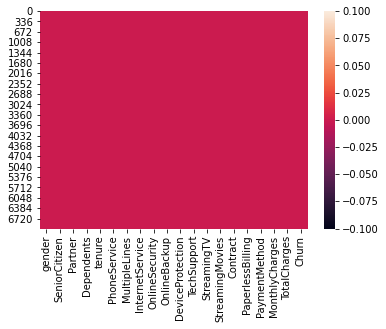

In [37]:
#visualize null values
sns.heatmap(df.isnull())
plt.show()

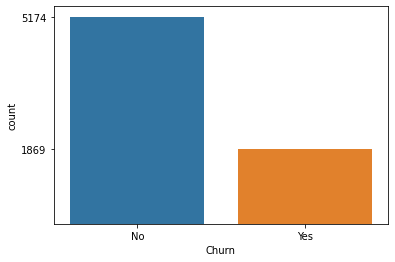

In [38]:
#we predict churn (target)
#how many 'yes' and 'no' in target column churn(loss of customer) in 
#visualize form then use inbuilt method countplot() because data is categorical
sns.countplot(data=df,x='Churn')
c=df["Churn"].value_counts()
plt.yticks(c)
plt.show()

In [39]:
#separate numerical type column and object type column from dataset and hold
#this data into new dataset named as df_num and df_cat respectively
df_num=df.select_dtypes(["float64","int64"])
df_cat=df.select_dtypes("object")

In [40]:
#apply LabelEncoder
from sklearn.preprocessing import LabelEncoder
for col in df_cat:
    #create object of LabelEncoder
    le=LabelEncoder()
    df_cat[col] = le.fit_transform(df_cat[col])

In [41]:
#check
df_cat.head()

,gender,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Churn
0,0,1,0,0,1,0,0,2,0,0,0,0,0,1,2,0
1,1,0,0,1,0,0,2,0,2,0,0,0,1,0,3,0
2,1,0,0,1,0,0,2,2,0,0,0,0,0,1,3,1
3,1,0,0,0,1,0,2,0,2,2,0,0,1,0,0,0
4,0,0,0,1,0,1,0,0,0,0,0,0,0,1,2,1


In [43]:
#to concatenate df_num,df_cat and hold in new data frame df_new
df_new = pd.concat([df_num,df_cat],axis=1)
df_new.head()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,gender,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Churn
0,0,1,29.85,29.85,0,1,0,0,1,0,0,2,0,0,0,0,0,1,2,0
1,0,34,56.95,1889.50,1,0,0,1,0,0,2,0,2,0,0,0,1,0,3,0
2,0,2,53.85,108.15,1,0,0,1,0,0,2,2,0,0,0,0,0,1,3,1
3,0,45,42.30,1840.75,1,0,0,0,1,0,2,0,2,2,0,0,1,0,0,0
4,0,2,70.70,151.65,0,0,0,1,0,1,0,0,0,0,0,0,0,1,2,1


In [44]:
#separate input and output variable from df_new dataframe: 
X=df_new.drop("Churn",axis=1) #input variable
Y=df_new["Churn"] #Target variable

In [45]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.3,random_state=1)

In [46]:
#train : use fit()
#test : predict()
#classification problem : report generate : use classification_report()
#user defined function create
def create_model(model):
    model.fit(X_train,Y_train)#we train the model
    y_pred=model.predict(X_test) #test
    print(classification_report(Y_test,y_pred))
    return model

In [47]:
from sklearn.metrics import classification_report

In [48]:
#Base Line Model means use Logistic Regression(we predict yes/no values then 
#use classification algorithm)

from sklearn.linear_model import LogisticRegression

In [49]:
#create the object of LogisticRegression class
lr=LogisticRegression()

In [50]:
#call function 
create_model(lr)

              precision    recall  f1-score   support

           0       0.86      0.88      0.87      1585
           1       0.62      0.58      0.60       528

    accuracy                           0.81      2113
   macro avg       0.74      0.73      0.74      2113
weighted avg       0.80      0.81      0.81      2113



LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [51]:
#train : use fit()
#test : predict()
#classification problem : report generate : use classification_report()
#user defined function create
def create_model(model):
    model.fit(X_train,Y_train)#we train the model
    y_pred=model.predict(X_test) #test
    print(classification_report(Y_test,y_pred))
    print("Confusion Matrix : ")
    print(confusion_matrix(Y_test,y_pred))
    return model

In [52]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

In [53]:
#Here data is imbalance means more difference between yes and no data of
#target
df["Churn"].value_counts()

No     5174
Yes    1869
Name: Churn, dtype: int64

In [54]:
#Here No : Majority class   and yes : Minority class  means data is imbalance
#so we have to balance the output variable
# to Balance the target variable then used sampling technique : -
#There are 2 types of sampling technique : -
# 1. Random Under Sampling
# 2. Random over sampling

In [55]:
from imblearn.under_sampling import RandomUnderSampler

In [56]:
'''If you have basically reducing the majority class that is known as Under sampling 
and if you are increasing the minority class that is known as over sampling '''

'If you have basically reducing the majority class that is known as Under sampling \nand if you are increasing the minority class that is known as over sampling '

In [57]:
from imblearn.under_sampling import RandomUnderSampler
 #If you have basically reducing the majority class that is known as Under sampling

In [58]:
#if converts majority class to minority class  then use RandomUnderSampler 
#Here in this dataset : Majority class : No  and Minority class : Yes
#create object of  RandomUnderSampler() class
rus = RandomUnderSampler()

In [59]:
#we have target : 70% : Y_train means training data and 30# : Y_test means testing data
pd.Series(Y_train).value_counts()

0    3589
1    1341
Name: Churn, dtype: int64

In [60]:
#fit_sample() inbuilt function which define RandomUnderSampler class and pass training data
#we have X_train and Y_train (70%)
X_sample_train,Y_sample_train = rus.fit_sample(X_train,Y_train)

In [61]:
#check 
pd.Series(Y_sample_train).value_counts()

1    1341
0    1341
dtype: int64

In [62]:
#Testing data 30% 
pd.Series(Y_test).value_counts() #this is unbalance

0    1585
1     528
Name: Churn, dtype: int64

In [63]:
#fit_sample() inbuilt function which define RandomUnderSampler class and pass testing data
#we have X_test and Y_test (30%)
X_sample_test,Y_sample_test = rus.fit_sample(X_test,Y_test)

In [64]:
#check 
pd.Series(Y_sample_test).value_counts()

1    528
0    528
dtype: int64

In [65]:
#we train the model with the help og Logistic regression after apply randomundersampler
#we create the object of Logistic Regression class
lr=LogisticRegression()

In [66]:
#create function
def create_model1(model):
    model.fit(X_sample_train,Y_sample_train)#we train the model
    Y_pred=model.predict(X_sample_test) #test
    print(classification_report(Y_sample_test,Y_pred))
    print("Confusion Matrix : ")
    print(confusion_matrix(Y_sample_test,Y_pred))
    return model

In [67]:
#call function 
create_model1(lr)

              precision    recall  f1-score   support

           0       0.79      0.73      0.76       528
           1       0.75      0.81      0.78       528

    accuracy                           0.77      1056
   macro avg       0.77      0.77      0.77      1056
weighted avg       0.77      0.77      0.77      1056

Confusion Matrix : 
[[388 140]
 [102 426]]


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [68]:
#Apply decisionTreeClassifier : this is select algorithm of classification ,Its help to select imp
#features to predict the o/p , not done manually data analysis to slect imp features
from sklearn.tree import DecisionTreeClassifier

In [69]:
#create the object of DecisionTreeClassifier class
dt1=DecisionTreeClassifier() #by default gini index method to select imp features

In [70]:
#call function create_model1
dt1=create_model1(dt1)

              precision    recall  f1-score   support

           0       0.70      0.67      0.68       528
           1       0.68      0.71      0.69       528

    accuracy                           0.69      1056
   macro avg       0.69      0.69      0.69      1056
weighted avg       0.69      0.69      0.69      1056

Confusion Matrix : 
[[352 176]
 [154 374]]


In [71]:
#here recall for 1 : 0.71 it is good but not better means model is overfit
dt1.feature_importances_ # to show reduction of all input features

array([0.02348246, 0.114408  , 0.21472282, 0.16281502, 0.018279  ,
       0.0213876 , 0.01824585, 0.00596653, 0.01306178, 0.01241677,
       0.02418408, 0.0182717 , 0.0109701 , 0.01913566, 0.009864  ,
       0.01363299, 0.21983096, 0.02379943, 0.05552527])

In [72]:

X.columns

Index(['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges', 'gender',
       'Partner', 'Dependents', 'PhoneService', 'MultipleLines',
       'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod'],
      dtype='object')

In [73]:
from sklearn import tree

In [74]:
features=X.columns

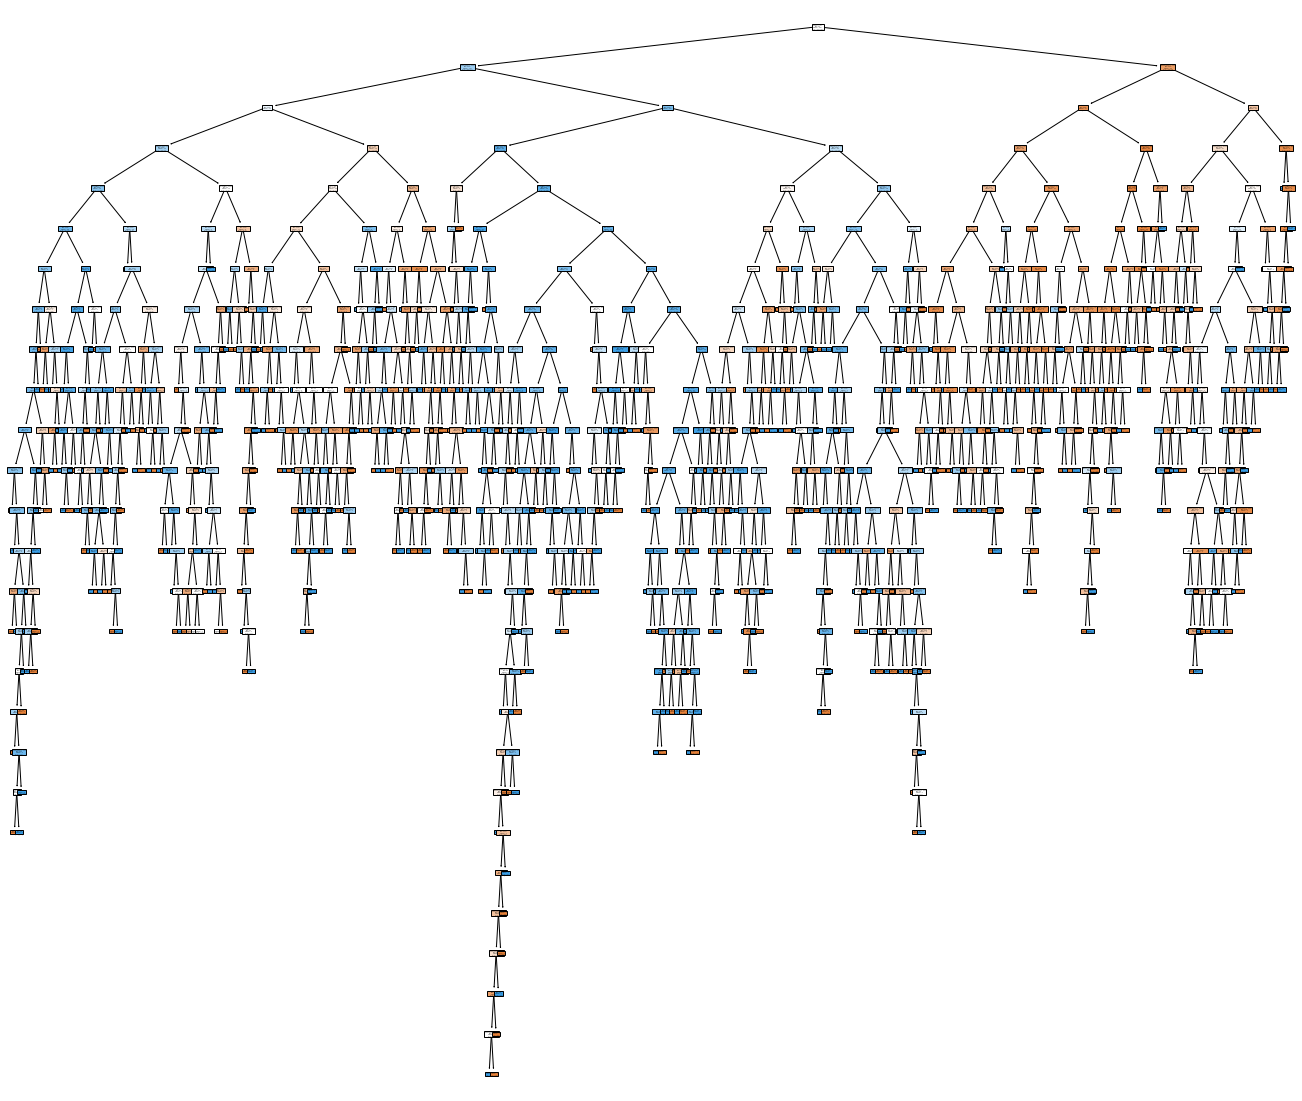

In [75]:
fig=plt.figure(figsize=(23,20))
_=tree.plot_tree(dt1,feature_names=features,filled=True)

In [76]:
#recall =0.70 means model is overfit , to reduced / remove overfit problem so apply pruning technique
#in decisiontreeclassifier class
#1. max_depth parameter : it cannot >8 
#create the object of DecisionTreeClassifier class
dt2=DecisionTreeClassifier(max_depth=8) #by default gini index

In [77]:
#call function 
dt2=create_model1(dt2)

              precision    recall  f1-score   support

           0       0.76      0.70      0.73       528
           1       0.72      0.78      0.75       528

    accuracy                           0.74      1056
   macro avg       0.74      0.74      0.74      1056
weighted avg       0.74      0.74      0.74      1056

Confusion Matrix : 
[[369 159]
 [115 413]]


In [78]:
F=dt2.feature_importances_
print(np.round(F,2))

[0.   0.14 0.18 0.1  0.   0.01 0.   0.01 0.01 0.02 0.02 0.01 0.   0.01
 0.01 0.01 0.4  0.01 0.03]


In [79]:
X.columns

Index(['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges', 'gender',
       'Partner', 'Dependents', 'PhoneService', 'MultipleLines',
       'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod'],
      dtype='object')

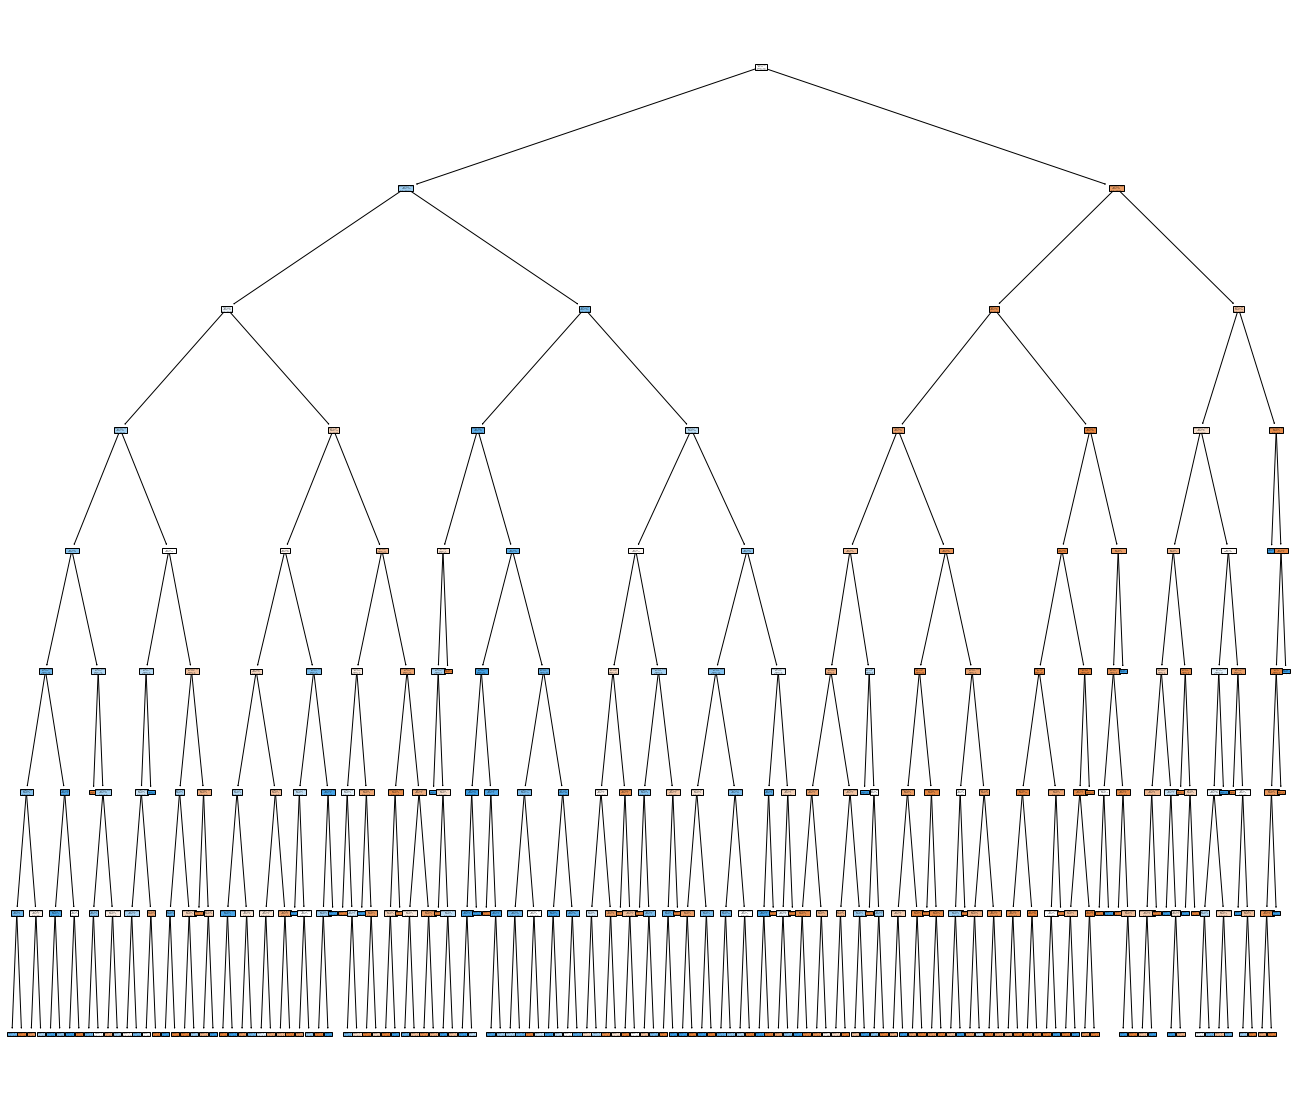

In [80]:
fig=plt.figure(figsize=(23,20))
_=tree.plot_tree(dt2,feature_names=features,filled=True)